In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [ ]:

def integration_limits(offset, width, period, windows_num):
     """
     Calculates integration limits for timebins.
     Args: 
          * offset (float): offset of the timebin sequence.
          * width  (float): width of the timebins.
          * period (float): time distance between adjacent timebins.
          * windows_num (float): total number of timebins in a sequence.

     Returns: 
          * pairs (tuple): a pairs of integration limits (lower limit, upper limit) for each timebin 
     """
     pairs = []
     for i in range(windows_num): 
          start_point = offset + i * period
          end_point = offset + i * period + width
          pairs.append((start_point, end_point))
     return pairs

        

def calc_timebins_areas(x_data, y_data, limits):
     """ 
     Calculates timebin areas for given input time(x_data), detection counts (y_data) and integration limits.
     Args: 
          * x_data (np.array): time array. 
          * y_data (np.array): detection counts array.
          * limits (tuple):    integration limits.
     Returns:
          * areas (list): list of calculated timebin areas.
     """
     areas = []
     for tuple, pairs in enumerate(limits):
          t_start = np.nonzero(np.isclose(x_data, pairs[0], atol=1))[0][0]
          t_stop = np.nonzero(np.isclose(x_data, pairs[1], atol=1))[0][0]
          area = np.trapz(y_data[t_start:t_stop], range(t_start, t_stop))
          areas.append(area)
     return areas



def estimate_relative_probability(counts_arr):
    """ 
    Estimates relative propabilitys of the timebins from a given photon counts array
    Args: 
        counts_arr (float): timebin photon counts array
    Returns:  
        probs (float): estimated relative probabilities array
    """
    counts_arr = np.array(counts_arr)
    n = len(counts_arr)
    probs = np.zeros(n)
    for i in range(n):
         probs[i] = counts_arr[i] / np.sum(counts_arr)
    return probs



def estimate_relative_entropy(rel_chann_probs_arr):
    """ 
    Estimates relative entropy of relative probabilities under test and uniform probability.
    Args: 
        rel_chann_probs_arr (float): relative probabilities array.
    Returns: 
        e(float): relative channel entropy, channels number correspond to the length of input probabilities array.
    """
    s = 0
    m = len(rel_chann_probs_arr)
    for p in rel_chann_probs_arr:
        s += p * np.log(p)

    e = s / (np.log(1 / m))
    print('Relative entropy for '+str(m)+' channels = '+str(e))
    return e 



def estimate_max_relative_deviation(chann_probs_arr):
    """ 
    Estimates relative channel deviation of relative probabilities under test and uniform probability of same channel number.
    Args: 
        rel_chann_probs_arr (float): relative probabilities array.
    Returns: 
        (float): relative channel deviation, channels number correspond to the length of input probabilities array.
    """
    m = len(chann_probs_arr)
    d = []
    for p in chann_probs_arr:
        d.append(np.abs(p - (1/m)))
    print('Relative channel deviation for '+str(m)+' channels = ', m * np.max(d))
    return m * np.max(d)



def plot_timebin_probability(xdata, ydata, windows_num, peaks_height=4_000, plot_uniform_probability=False, plot_linear_fit=False):
    counts_peaks, _ = scipy.signal.find_peaks(ydata, height=peaks_height, width=10) 
    peak_vals = ydata[counts_peaks]
    limits = integration_limits(offset=114, width=10, period=60.15, windows_num=windows_num)
    areas = calc_timebins_areas(xdata, ydata, limits)
    probs_areas = estimate_relative_probability(areas)
    plt.bar(xdata[counts_peaks], height=probs_areas, width=40, alpha=0.4, color='grey', zorder=0)
    plt.plot(xdata, ydata/np.sum(peak_vals), color='C3', zorder=2)
    plt.fill_between(xdata, ydata/np.sum(peak_vals), where= (xdata > 100) & (xdata < 1100),color='C3', zorder=2)
    if plot_uniform_probability:
        plt.axhline(y=1/windows_num, label='Uniform '+str(windows_num)+' probability distribution', color='black', linewidth=1.0)
    if plot_linear_fit:
        fit_params = np.polyfit(xdata[counts_peaks], probs_areas, deg=1)
        plt.plot(xdata[counts_peaks], fit_params[0]*xdata[counts_peaks] + fit_params[1], color='k', linewidth=1.0)
    plt.xlim(0, 1100)

Text(0.05, 0.5, 'Counts')

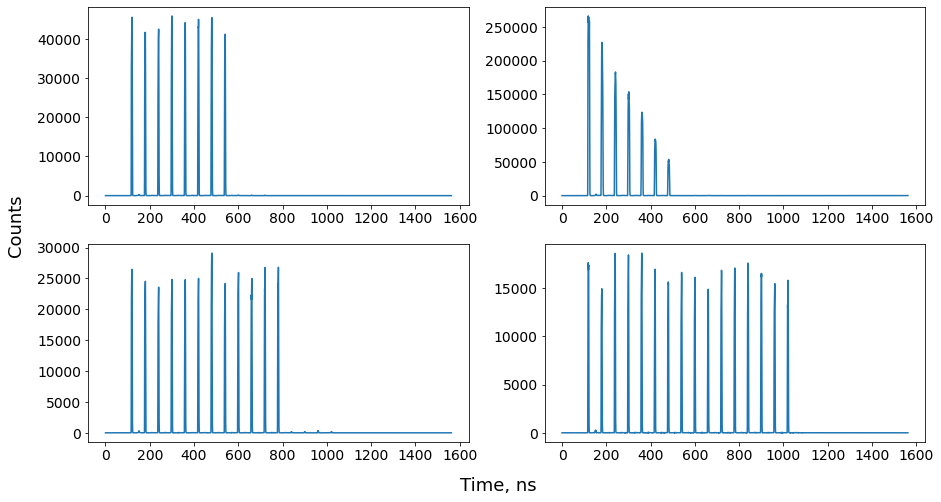

In [ ]:
# Import exctracted counts from the time-tag 
bins_7, counts_7, _ = np.loadtxt('linear_decrease_7.csv', delimiter=';')
bins_8, counts_8, _ = np.loadtxt('coh1_8ch.csv', delimiter=';')
bins_12, counts_12, _ = np.loadtxt('coh1_12ch.csv', delimiter=';')
bins_16, counts_16, _ = np.loadtxt('coh1_16ch.csv', delimiter=';')


# Display raw data
fig = plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1)
plt.plot(bins_8, counts_8)


plt.subplot(2, 2, 2)
plt.plot(bins_7, counts_7)

plt.subplot(2, 2, 3)
plt.plot(bins_12, counts_12)

plt.subplot(2, 2, 4)
plt.plot(bins_16, counts_16)

fig.text(0.505, 0.04, 'Time, ns', ha='center', fontsize=18)
fig.text(0.05, 0.5, 'Counts', va='center', rotation='vertical', fontsize=18)


In [28]:
# Relative entropy and relative channel deviation estimation for 8 channels

limits = integration_limits(offset=115, width=10, period=60.15, windows_num=8)
areas = calc_timebins_areas(bins_8, counts_8, limits)
probability_8 = estimate_relative_probability(areas)
uniform_8 = (1/8) * np.ones(8)
rel_entropy_8 = estimate_relative_entropy(probability_8)
rel_deviation_8 = estimate_max_relative_deviation(probability_8)

Relative entropy for 8 channels = 0.9995482909961223
Relative channel deviation for 8 channels =  0.0670178135250119


In [29]:
# Relative entropy and relative channel deviation estimation for 12 channels

limits = integration_limits(offset=115, width=10, period=60.15, windows_num=12)
areas = calc_timebins_areas(bins_12, counts_12, limits)
probability_12 = estimate_relative_probability(areas)
uniform_12 = (1/12) * np.ones(12)
rel_entropy_8 = estimate_relative_entropy(probability_12)
rel_deviation_8 = estimate_max_relative_deviation(probability_12)

Relative entropy for 12 channels = 0.9990724800081613
Relative channel deviation for 12 channels =  0.14746765955129937


In [30]:
# Relative entropy and relative channel deviation estimation for 16 channels

limits = integration_limits(offset=115, width=10, period=60.15, windows_num=16)
areas = calc_timebins_areas(bins_16, counts_16, limits)
probability_16 = estimate_relative_probability(areas)
uniform_16 = (1/16) * np.ones(16)
rel_entropy_16 = estimate_relative_entropy(probability_16)
rel_deviation_16 = estimate_max_relative_deviation(probability_16)

Relative entropy for 16 channels = 0.9991320541884104
Relative channel deviation for 16 channels =  0.11438879965808901


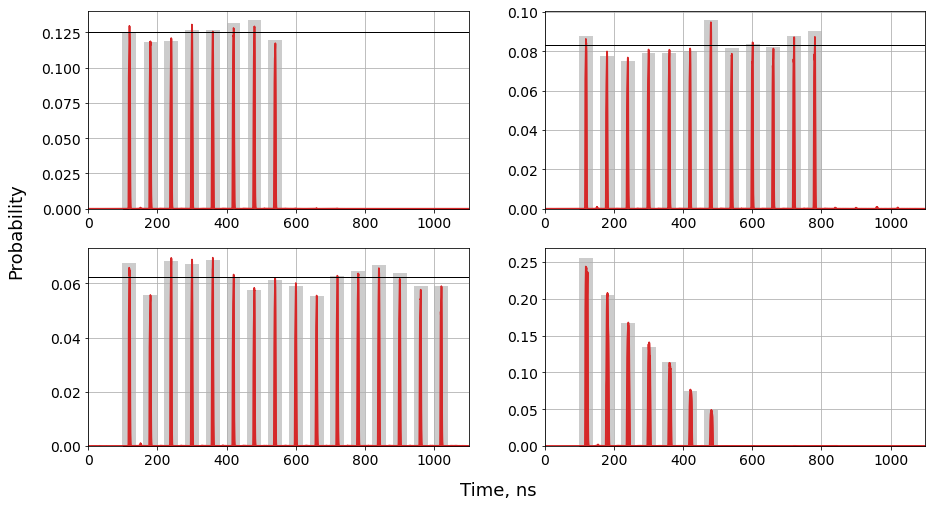

In [31]:
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1)
plot_timebin_probability(bins_8, counts_8, windows_num=8, plot_uniform_probability=True)
plt.grid()

plt.subplot(2, 2, 2)
plot_timebin_probability(bins_12, counts_12, windows_num=12, plot_uniform_probability=True)
plt.grid()

plt.subplot(2, 2, 3)
plot_timebin_probability(bins_16, counts_16, windows_num=16, plot_uniform_probability=True)
plt.grid()

plt.subplot(2, 2, 4)
plot_timebin_probability(bins_7, counts_7, windows_num=7)
plt.grid()

fig.text(0.505, 0.04, 'Time, ns', ha='center', fontsize=18)
fig.text(0.05, 0.5, 'Probability', va='center', rotation='vertical', fontsize=18)
plt.savefig('timebin_probabilities_panel.pdf', format='pdf')